In [18]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from bayesian import BMPI

In [54]:
# Obtain coordinates and function
coordinates = np.random.randn(100, 128)*5.0

def f(x):
    x = np.atleast_2d(x)
    mu1 = np.ones(x.shape)*0.0
    return (np.sum(np.abs(x-mu1), axis=1))[:,None]

f_c = f(coordinates)

In [55]:
# Set up optimization model
optimizer = BMPI(coordinates, n_iter=15, ac_func='MPI')

In [56]:
# Optimize function
optimizer.optimize(f)

BMPI(domain=[{'name': 'prompt', 'type': 'bandit', 'domain': array([[ 1.7351 , -5.35251, ..., -4.84641, -3.34652],
       [-5.80116, -2.16349, ..., -3.87957,  9.5109 ],
       ...,
       [-2.54895, -4.6434 , ..., -1.9517 ,  9.26199],
       [ 0.93377,  8.24514, ..., -1.73127, -7.14654]])}],
   evaluator_type='sequential', initial_design_numdata=0, model='MPI',
   model_type='GP', n_iter=15, verbosity=True)

In [57]:
# Get evaluations
x_opt = optimizer.model.x_opt[0]
y_opt = optimizer.model.x_opt[1]
X = optimizer.model.X[:,0]
Y = optimizer.model.X[:,1]

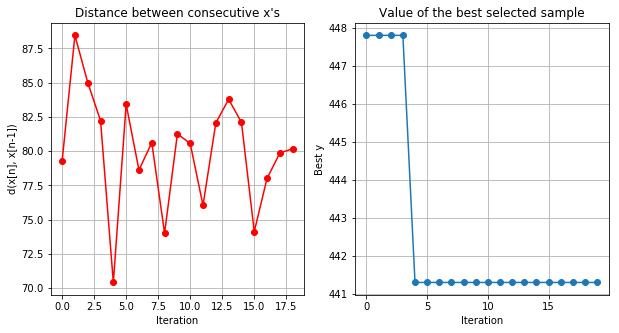

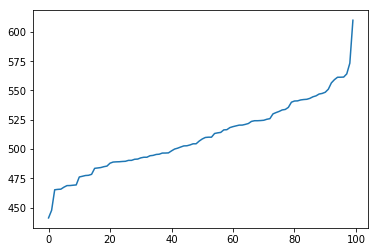

In [59]:
# Check for convergence
optimizer.model.plot_convergence()
plt.plot(sorted(f_c))